# Importing libraries

In [630]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
# display all columns of the dataframe
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [631]:
#setting the plot size using rcParams
plt.rcParams['figure.figsize'] = [15,8]

In [632]:
#importing datasets for training and testing the models
df=pd.read_csv("/Users/rajsekhar/Downloads/survey.csv")

#rwading the first 5 records from the training data set
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Understanding the data set

In [633]:
#checking the number of rows and columns in the training data set
df.shape

(1259, 27)

In [634]:
# 'dtypes' gives the data type for each column
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

Now all the features are having correct datatypes

In [635]:
#Check the dataset for missing data
if df.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(df.isnull().sum().sum()))

There is 1892 missing data in our dataset 


In [636]:
#Check our missing data from which columns and how many unique features they have.
frame = pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis = 1, sort= False)
frame

,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


In [637]:
#it gives the statistical summary of all the categorical variables
df.describe(include=object)

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5


# DATA PREPARATION

In [638]:
# Check The Boolean of Missing Value Before Cleansing
df.isna().any()

Timestamp                    False
Age                          False
Gender                       False
Country                      False
state                         True
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
comments                      True
dtype: bool

In [639]:
#finding the unique values in the column gender
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

We see that there are lots of misspelled words and synonymns have been used.This is the reason there are 45 unique values.We will convert them into 3 parts male(M),female(F) and transgender(T). 

In [640]:
#Check unique data in gender columns
print(df['Gender'].unique())
print('')
print('-'*75)
print('')
#Check number of unique data too.
print('number of unique Gender in our dataset is :', df['Gender'].nunique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

---------------------------------------------------------------------------

number of unique Gender in our dataset is : 49


In [641]:
#Gender data contains dictation problems, nonsense answers, and too unique Genders.
#_So Let's clean it and organize it into Male, Female, and other categories

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

print(df['Gender'].unique())

['Female' 'Male' 'Other']


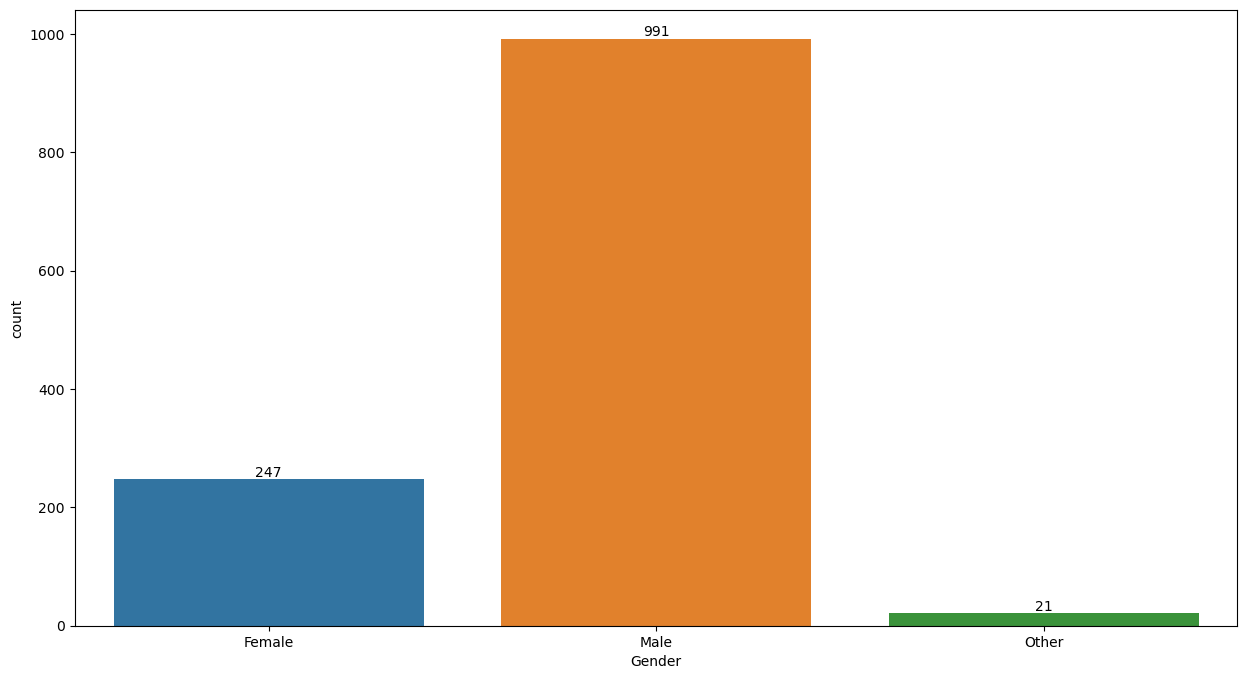

In [642]:
#Plot Genders column after cleaning and new categorizing
ax = sns.countplot(data=df, x='Gender');
ax.bar_label(ax.containers[0]);

In [643]:
#Checking the number of male,female and transgender in the gender column
df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [644]:
#Our data is clean now ? let's see.
if df.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(df.isnull().sum().sum()))

There is 1892 missing data


In [645]:
#Let's check duplicated data.
if df.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(df.duplicated().sum()))
    #If there is duplicated data drop it.
    df.drop_duplicates(inplace=True)

print('-'*50)
print(df.duplicated().sum())

There is no duplicated data:
--------------------------------------------------
0


In [646]:
#finding the unique values of age column
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [647]:
#We had a lot of nonsense answers in the Age column too
#This filtering will drop entries exceeding 100 years and those indicating negative values.
df.drop(df[df['Age']<0].index, inplace = True)
df.drop(df[df['Age']>99].index, inplace = True)

print(df['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


# Label encoding of the treatment column

In [648]:
# replace 'no' with zero
df['treatment'] = df['treatment'].replace('No', 0)
# replace 'yes' with one
df['treatment'] = df['treatment'].replace('Yes', 1)

#displaying the first 5 records to check the treatment column after label enconding
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,1,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,0,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,0,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,1,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,0,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


1    633
0    621
Name: treatment, dtype: int64

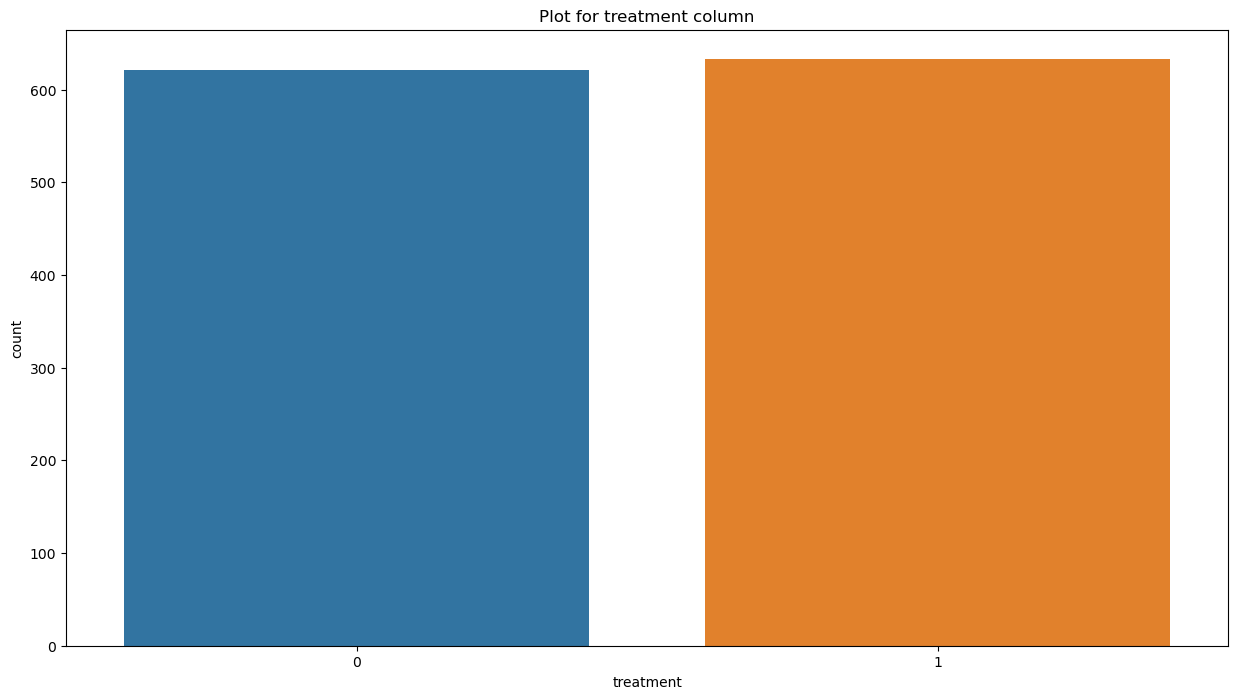

In [649]:
#plotting the countplot for treatment column
sns.countplot(data=df, x='treatment')
plt.title("Plot for treatment column")

#checking the count of each class
df['treatment'].value_counts()

The Data is mostly balanced

# Exploratory Data Analysis


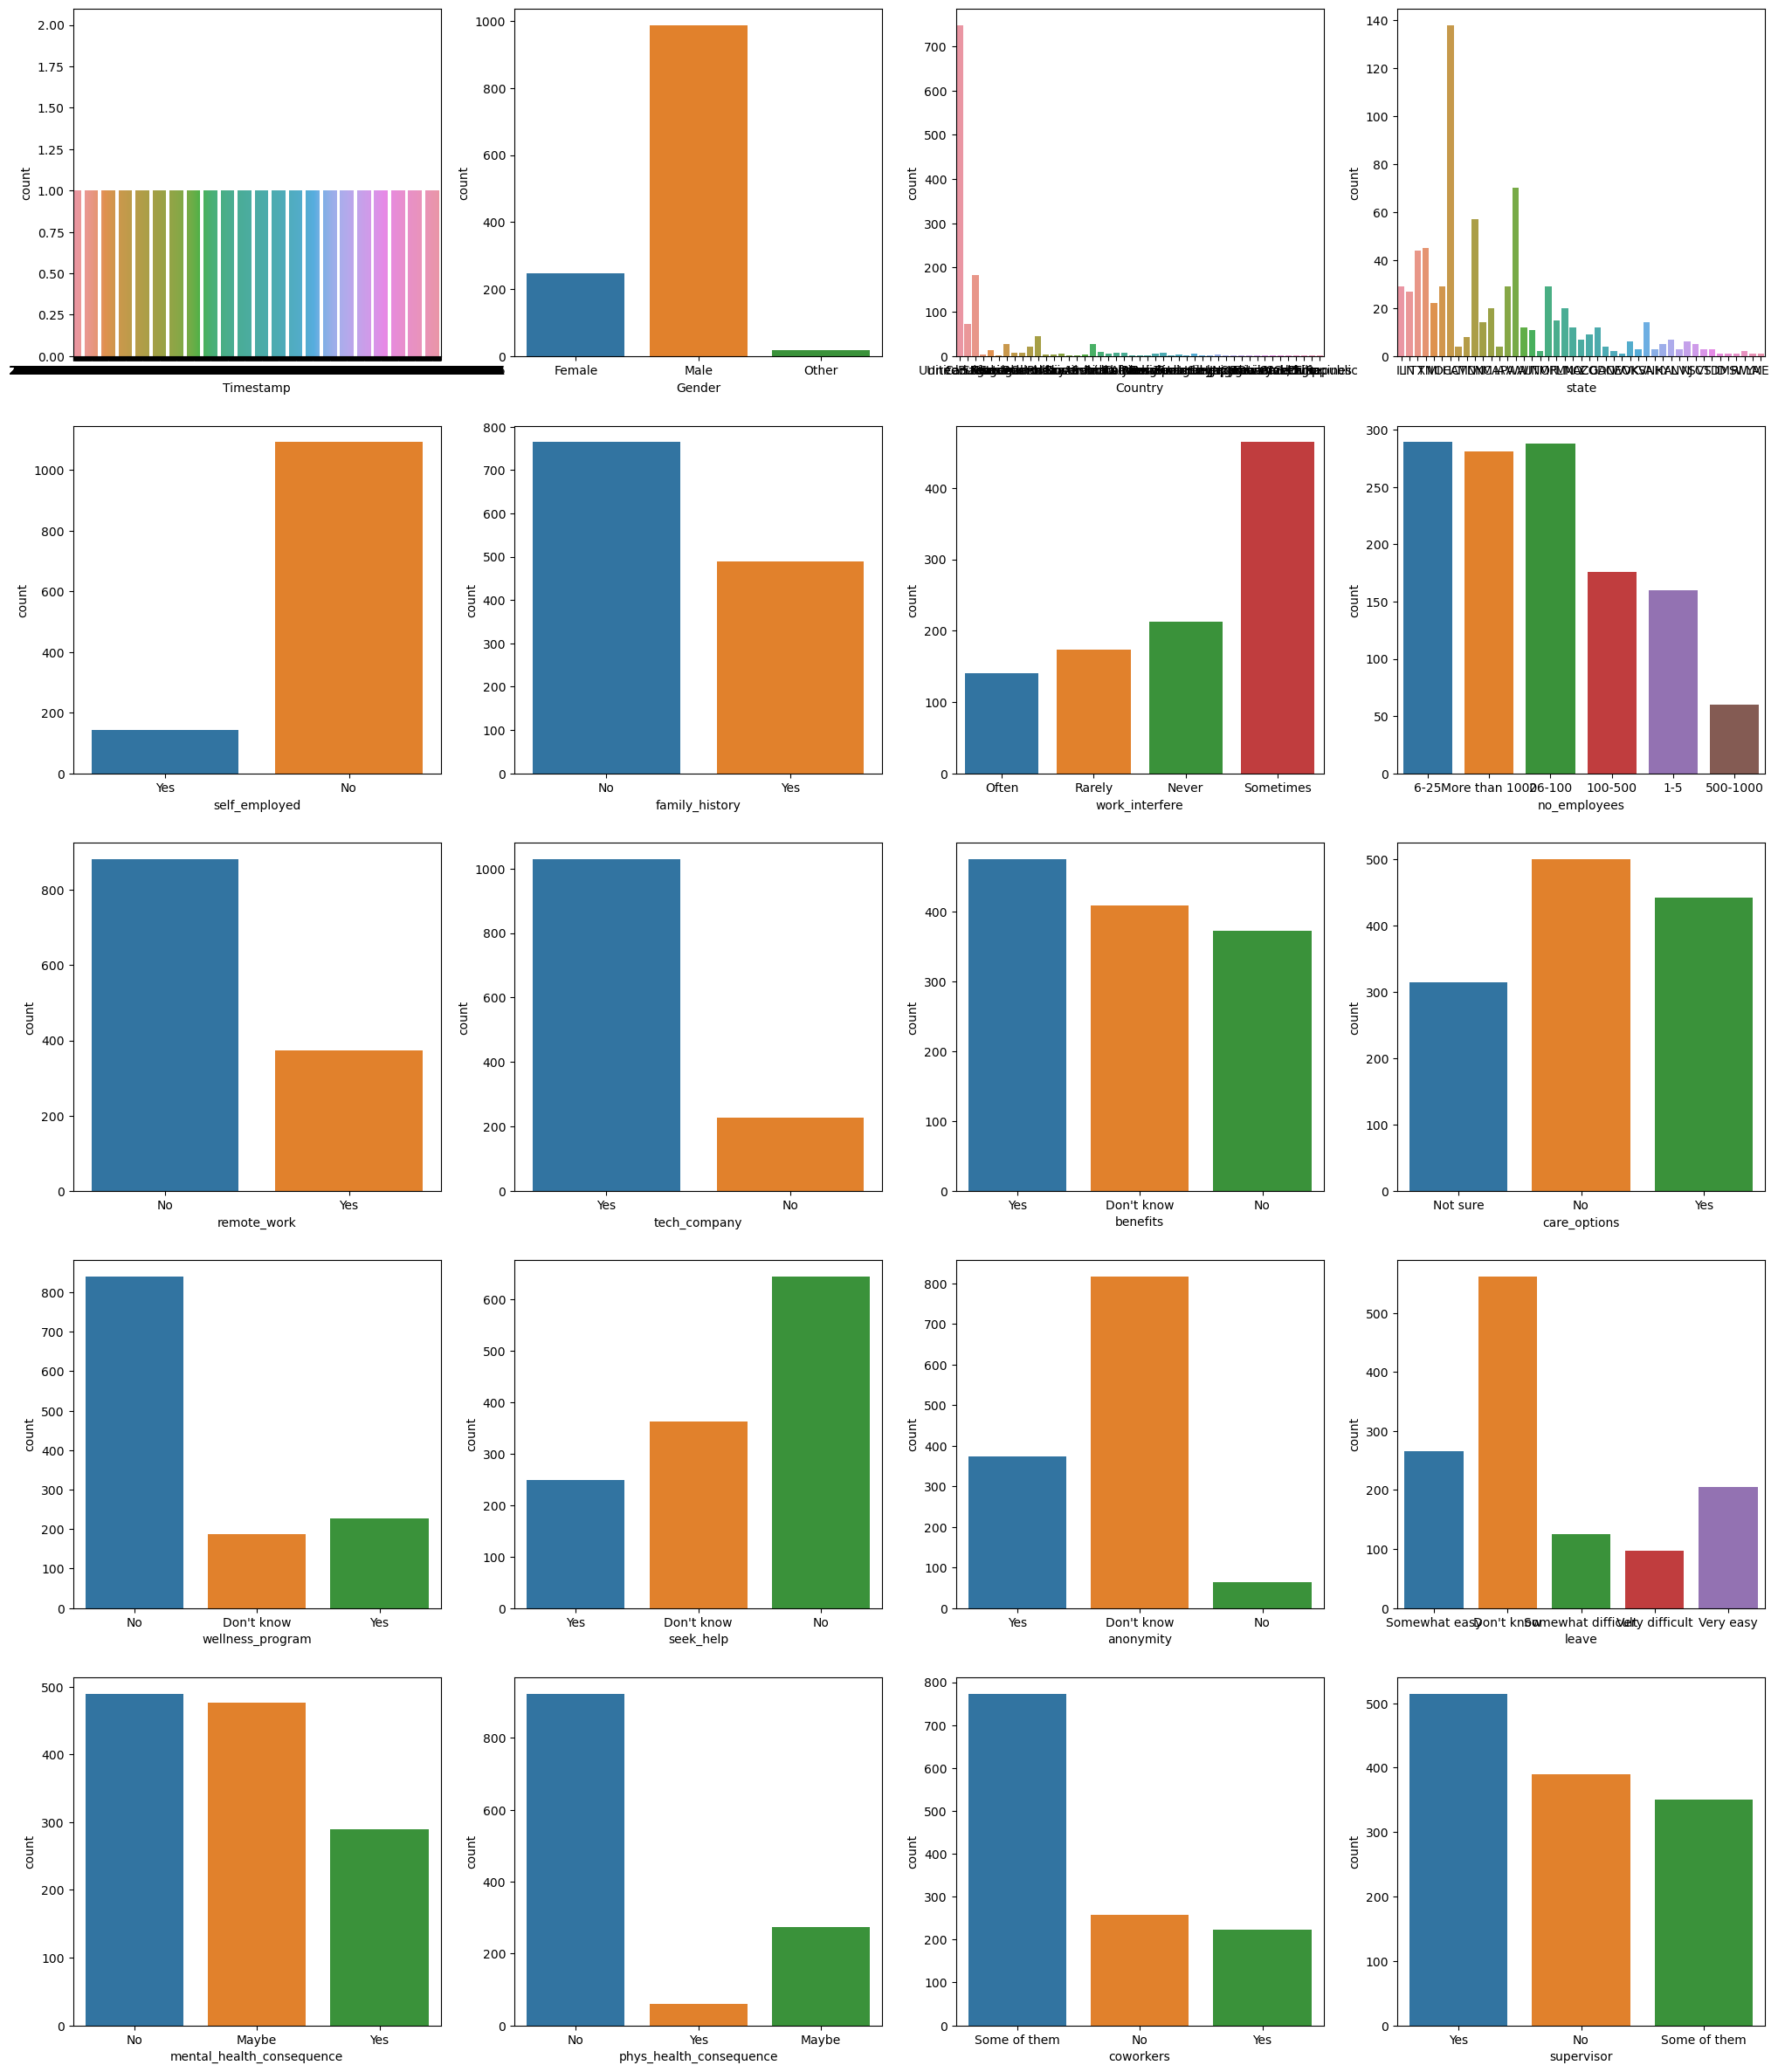

In [650]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]
z=['Country','state']
# use for loop to check the data type of each variable
for column in df:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df[column]):
        if column!=z:
        
        # append the variables with 'categoric' data type in the list 'categorical'
             categorical.append(column)


# plot the count plot for each categorical variable 
fig, ax = plt.subplots(nrows = 5, ncols = 4, figsize=(25, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    sns.countplot(data=df, x=variable, ax = subplot)

# display the plot
plt.show()

# Finding the missing values

In [651]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
Percent = ((Total*100)/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
comments,1091,87.001595
state,513,40.909091
work_interfere,263,20.972887
self_employed,18,1.435407
seek_help,0,0.000000
obs_consequence,0,0.000000
mental_vs_physical,0,0.000000
phys_health_interview,0,0.000000
mental_health_interview,0,0.000000
supervisor,0,0.000000


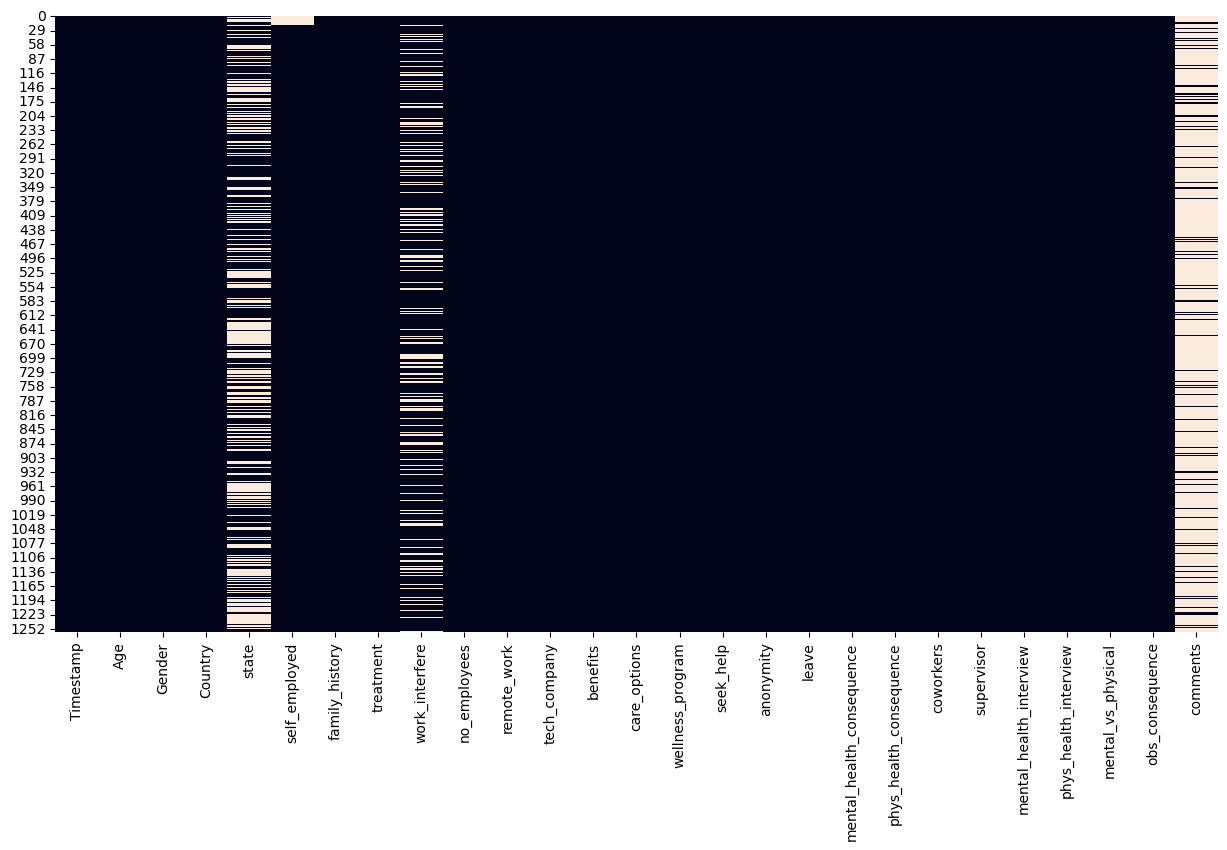

In [652]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

# Handling the missing values

In [653]:
df['work_interfere']=df['work_interfere'].fillna('Not mentioned')
df.drop(['state','Country','Timestamp','comments'],axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

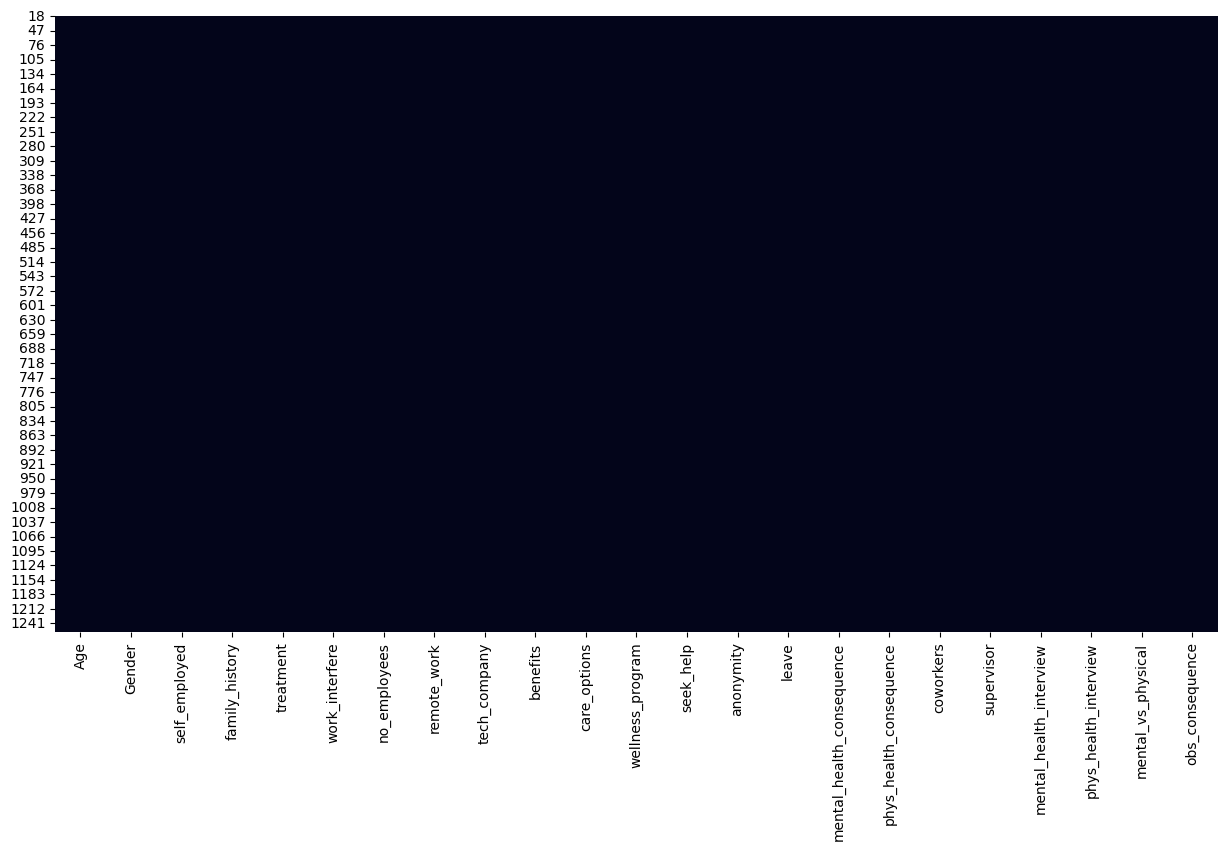

In [654]:
#Checking if all the null values have been handled or not
sns.heatmap(df.isnull(),cbar=False,color='black')
plt.show()

In [655]:
#Use LabelEncoder to change the Dtypes to 'int'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Make the dataset include all the columns we need to change their dtypes
columns_to_encode = ['Gender', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence']
#Write a Loop for fitting LabelEncoder on columns_to_encode
for columns in columns_to_encode:
    df[columns] = le.fit_transform(df[columns])

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 18 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1236 non-null   int64
 1   Gender                     1236 non-null   int64
 2   self_employed              1236 non-null   int64
 3   family_history             1236 non-null   int64
 4   treatment                  1236 non-null   int64
 5   work_interfere             1236 non-null   int64
 6   no_employees               1236 non-null   int64
 7   remote_work                1236 non-null   int64
 8   tech_company               1236 non-null   int64
 9   benefits                   1236 non-null   int64
 10  care_options               1236 non-null   int64
 11  wellness_program           1236 non-null   int64
 12  seek_help                  1236 non-null   int64
 13  anonymity                  1236 non-null   int64
 14  leave                  

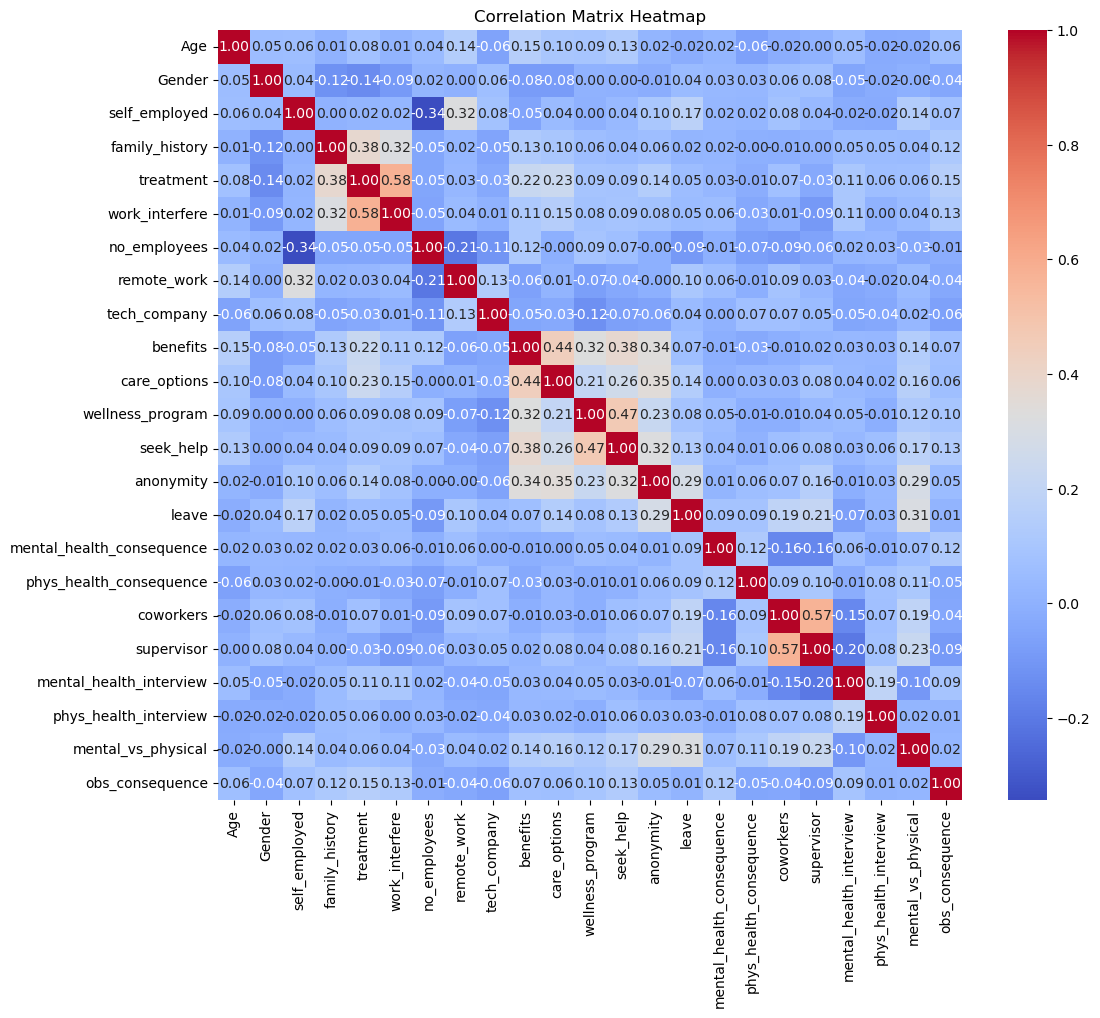

In [656]:
# Compute the correlation matrix
corr_matrix_df = df.corr()
 
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Creating generalised functions

In [657]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))


# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))


# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Define the labels for the confusion matrix
    labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))

    # plot the grid
    plt.grid(True)
    
    
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score','Cross-Validation Mean Accuracy','Cross-Validation Std Accuracy'])
    
def update_score_card(model,model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred),
                                    'Cross-Validation Mean Accuracy':cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean(),
                                    'Cross-Validation Std Accuracy':cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').std()}, 
                                    ignore_index = True)
    return(score_card)


# Preparing the data for building model

In [658]:
X=df.drop(['treatment'],axis=1)
y=df['treatment']

In [659]:
# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# Feature scaling (optional, but recommended for KNN)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (988, 22)
y_train (988,)
X_test (248, 22)
y_test (248,)


# Model 1(Support vector machine)

In [660]:
# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svc_model=svclassifier.fit(X_train, y_train)


In [661]:
# predict the values
y_pred = svclassifier.predict(X_test)

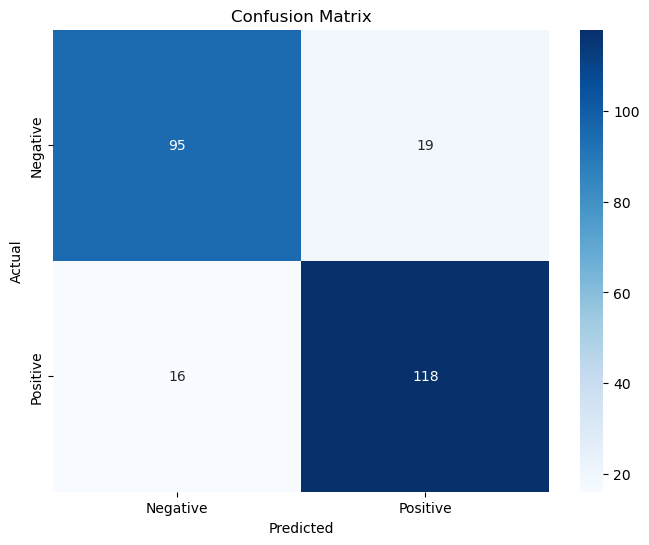

In [662]:
# call the function to plot the confusion matrix
plot_confusion_matrix(svc_model)

In [663]:
# compute the performance measures on test data
test_report = get_test_report(svc_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       114
           1       0.86      0.88      0.87       134

    accuracy                           0.86       248
   macro avg       0.86      0.86      0.86       248
weighted avg       0.86      0.86      0.86       248



In [664]:
# compute kappa score on test set
kappa_value = kappa_score(svc_model)

# print the kappa value
print(kappa_value)

0.7153351698806245


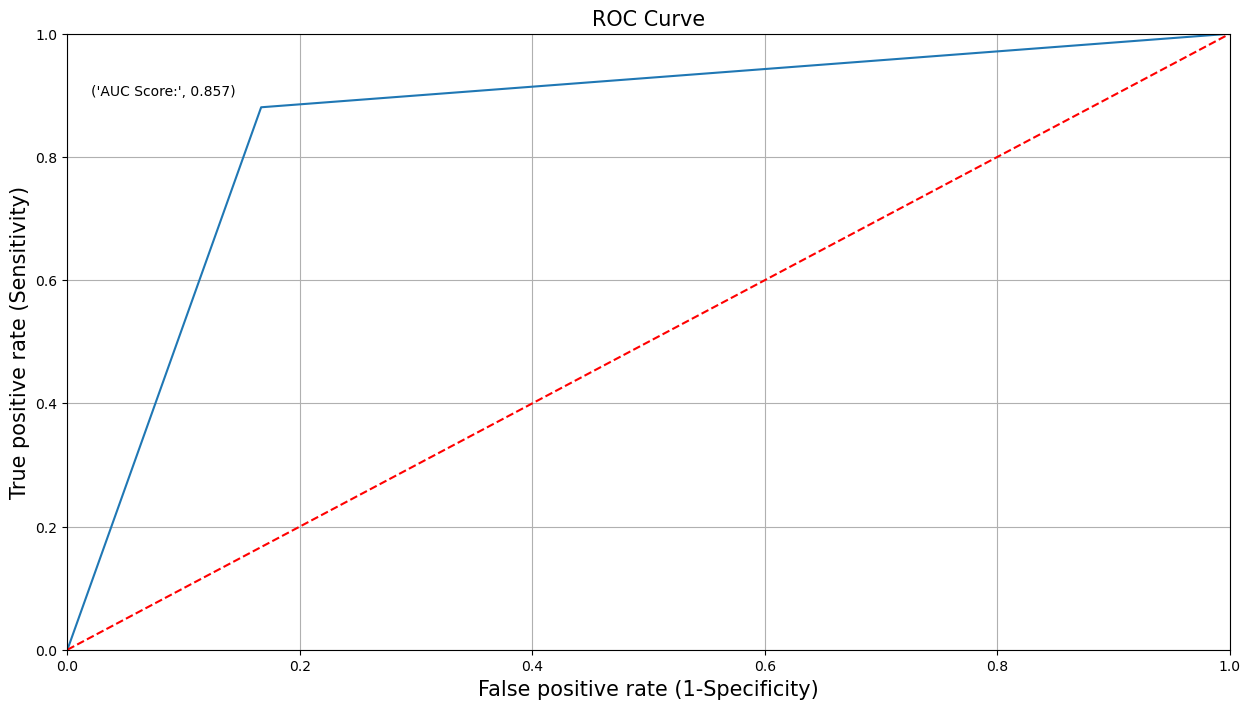

In [665]:
plot_roc(svc_model)

In [666]:
update_score_card(svc_model,model_name='SVM')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,Cross-Validation Mean Accuracy,Cross-Validation Std Accuracy
0,SVM,0.856965,0.861314,0.880597,0.858871,0.715335,0.870849,0.786407,0.032


[0.7611336032388664, 0.7995951417004049, 0.7398785425101214, 0.8734817813765182]
[0.6411290322580645, 0.8588709677419355, 0.8467741935483871, 0.8508064516129032]


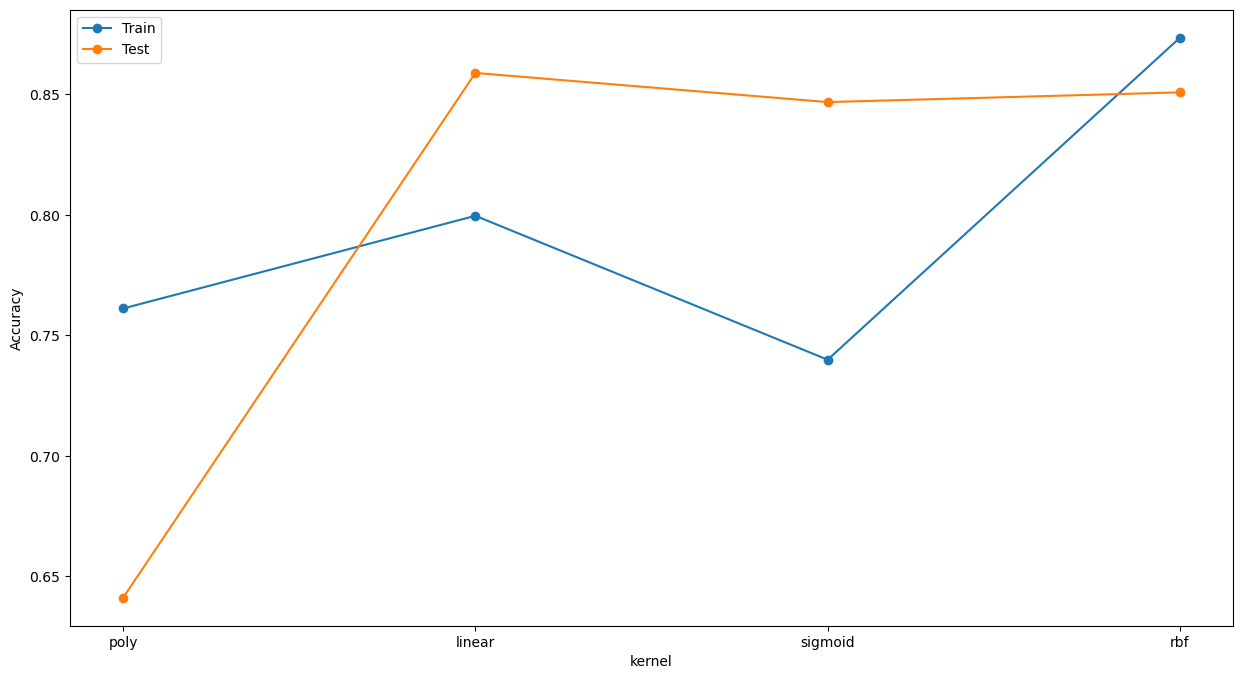

In [667]:

import sklearn.svm as sv
# SVM classification with different kernels
Acc_tr=[]
Acc_tes=[]
kernel=[]

for i in ['poly', 'linear', 'sigmoid', 'rbf']:
    clsfi=sv.SVC(kernel=i, degree=2)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    kernel.append(i)
print(Acc_tr)
print(Acc_tes)

plt.figure()
plt.plot(Acc_tr,label='Train', marker='o')
plt.plot(Acc_tes,label='Test', marker='o')
plt.xticks([0, 1, 2, 3], kernel)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#  Model 2(Support vector machine using grid search)

In [668]:
# build the model with best parameters obtained from above code
svclassifier_Poly_Grid = SVC(kernel='rbf', 
                            degree = 2, 
                            gamma = 'scale',
                           C = 1 )
# fit the model
svm=svclassifier_Poly_Grid.fit(X_train, y_train)

In [669]:
# degree: Degree of the polynomial
# C: value of C parameter or regularisation parameter
# gamma:
param_grid = { 
    'degree': [2,4,6,8,10], 
    'gamma' : ['auto','scale' ],
    'C': [0.5, 1,1.5]
}

In [670]:
CV_rfc = GridSearchCV(estimator= svclassifier_Poly_Grid, param_grid=param_grid, scoring='accuracy', cv= 5)
# fit the model
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, degree=2),
             param_grid={'C': [0.5, 1, 1.5], 'degree': [2, 4, 6, 8, 10],
                         'gamma': ['auto', 'scale']},
             scoring='accuracy')

In [671]:
# find the best parameters
CV_rfc.best_params_

{'C': 0.5, 'degree': 2, 'gamma': 'auto'}

In [672]:
# predict the values
y_pred= svclassifier_Poly_Grid.predict(X_test)

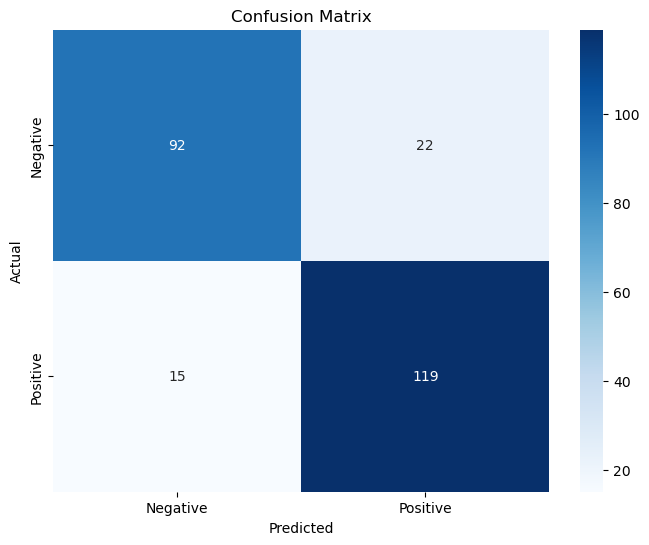

In [673]:
plot_confusion_matrix(svm)

In [674]:
test_report=get_test_report(svm)
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       114
           1       0.84      0.89      0.87       134

    accuracy                           0.85       248
   macro avg       0.85      0.85      0.85       248
weighted avg       0.85      0.85      0.85       248



In [675]:
# compute kappa score on test set
kappa_value = kappa_score(svm)

# print the kappa value
print(kappa_value)

0.6982769959226621


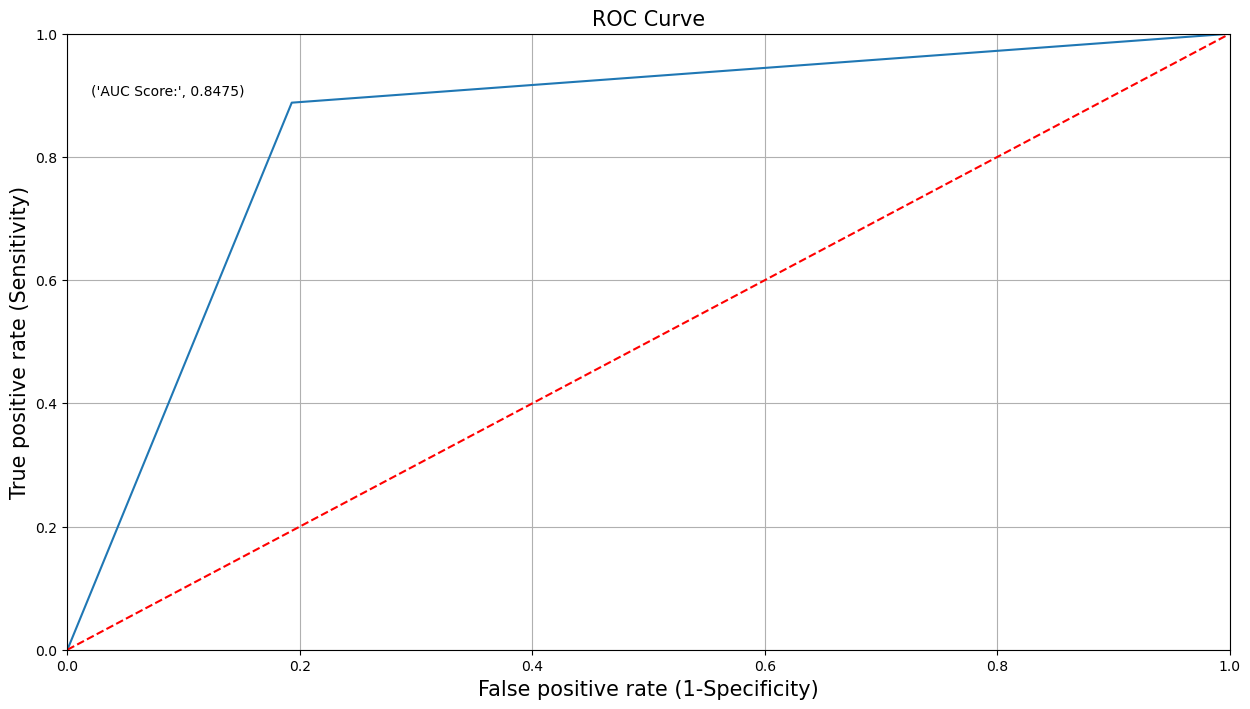

In [676]:
plot_roc(svm)

In [677]:
update_score_card(svm,model_name='SVM with grid search CV ')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,Cross-Validation Mean Accuracy,Cross-Validation Std Accuracy
0,SVM,0.856965,0.861314,0.880597,0.858871,0.715335,0.870849,0.786407,0.032000
1,SVM with grid search CV,0.847539,0.843972,0.888060,0.850806,0.698277,0.865455,0.783413,0.028501


# Model 3(Decision Tree)

In [678]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree = DecisionTreeClassifier(criterion = 'entropy')

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train)

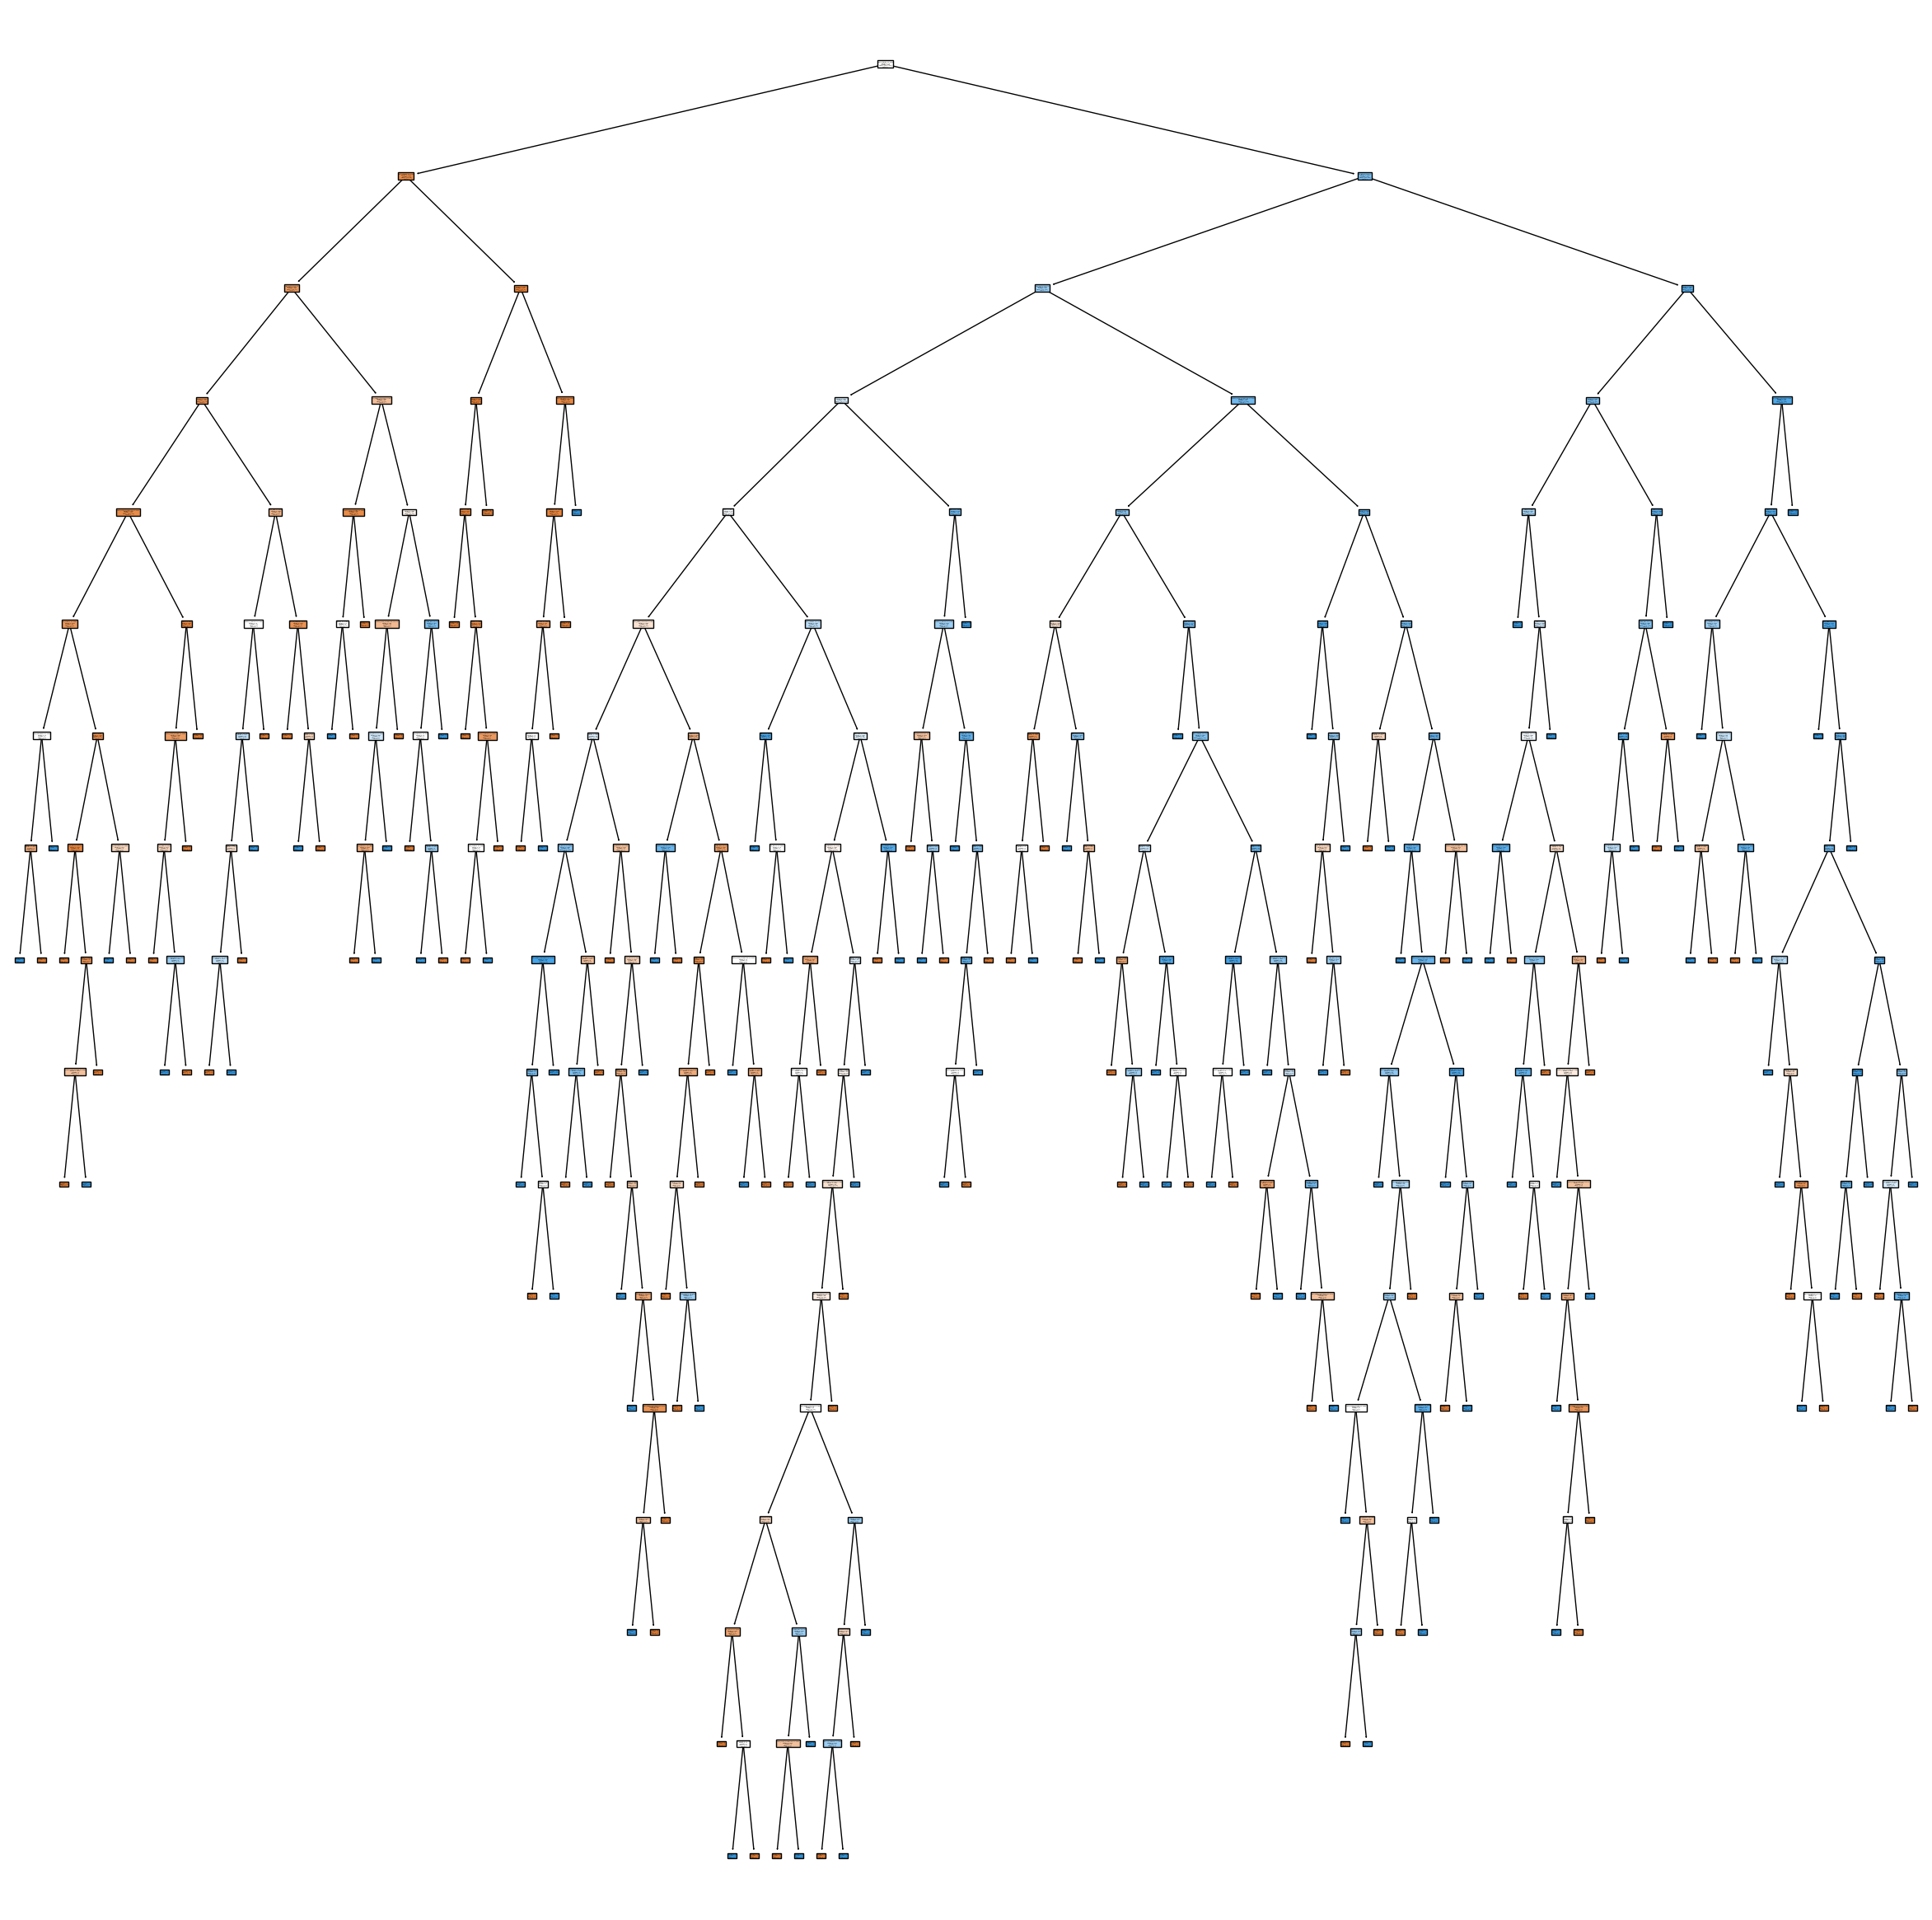

In [679]:
labels=X.columns

#plot the decisin tree
fig=plt.figure(figsize=(30,30))
z=tree.plot_tree(decision_tree_model,
                feature_names=labels,
                class_names=['0','1'],
                filled=True)

In [680]:
y_pred=decision_tree_model.predict(X_test)

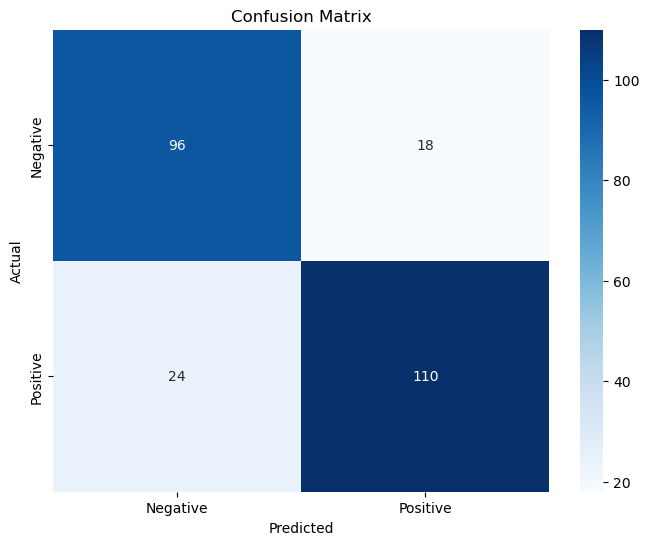

In [681]:
plot_confusion_matrix(decision_tree_model)

In [682]:
kappa_score(decision_tree_model)

0.6604068857589984

In [683]:
test_report=get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       114
           1       0.86      0.82      0.84       134

    accuracy                           0.83       248
   macro avg       0.83      0.83      0.83       248
weighted avg       0.83      0.83      0.83       248



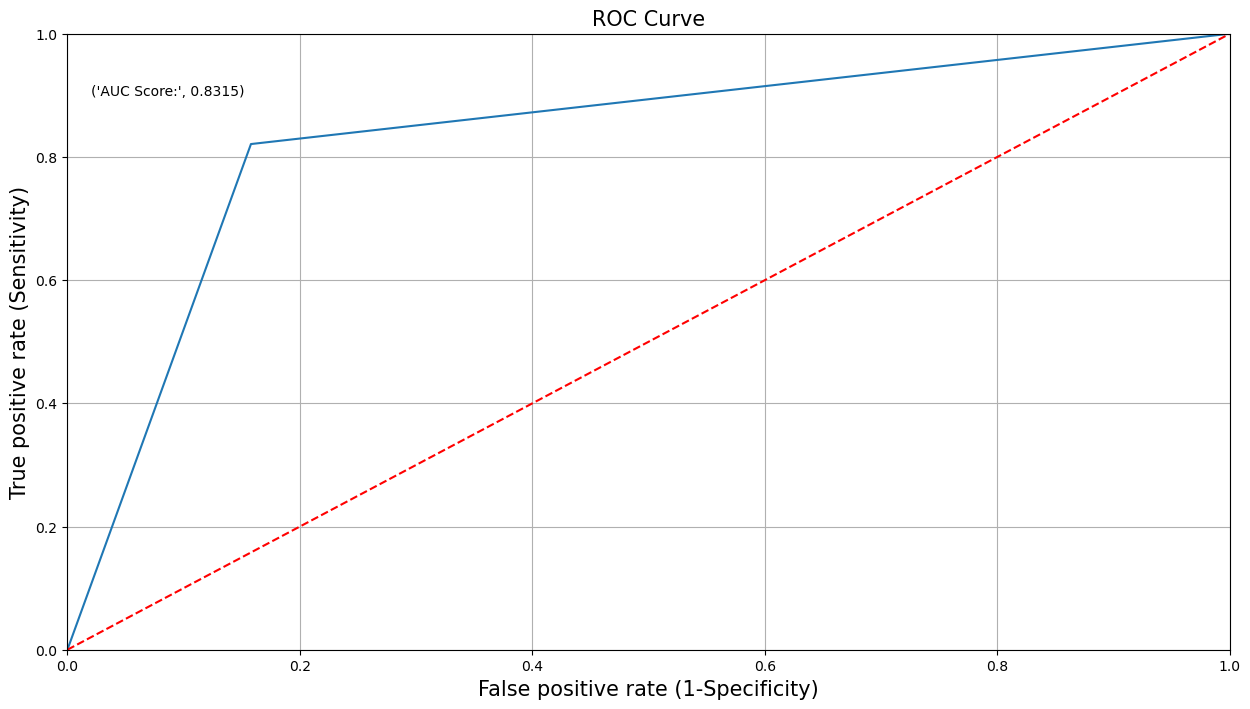

In [684]:
plot_roc(decision_tree)

In [685]:
update_score_card(decision_tree_model,model_name='Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,Cross-Validation Mean Accuracy,Cross-Validation Std Accuracy
0,SVM,0.856965,0.861314,0.880597,0.858871,0.715335,0.870849,0.786407,0.032000
1,SVM with grid search CV,0.847539,0.843972,0.888060,0.850806,0.698277,0.865455,0.783413,0.028501
2,Decision Tree,0.831500,0.859375,0.820896,0.830645,0.660407,0.839695,0.729790,0.013361


# Model 4(Decision Tree using grid search)

In [686]:
tuned_parameters=[{'criterion':['gini','entropy'],
                  'min_samples_split':[10,20,30],
                  'max_depth':[3,5,7],
                  'min_samples_leaf':[15,20,25,30,35],
                  'max_leaf_nodes':[5,10,15,20,25]
                  }]

In [687]:
tree_classification=DecisionTreeClassifier()
grid=GridSearchCV(estimator=tree_classification,
                 param_grid=tuned_parameters,
                 cv=10)
dt_grid=grid.fit(X_train,y_train)

print("best parameters:",dt_grid.best_params_,'\n')

best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 15, 'min_samples_split': 10} 



In [688]:
dt_grid_model=DecisionTreeClassifier(criterion=dt_grid.best_params_.get('criterion'),
                                     max_depth=dt_grid.best_params_.get("max_depth"),
                                     max_leaf_nodes=dt_grid.best_params_.get("max_leaf_nodes"),
                                     min_samples_leaf=dt_grid.best_params_.get("max_leaf_nodes"),
                                     min_samples_split=dt_grid.best_params_.get("min_samples_split"))
dt_grid_model=dt_grid_model.fit(X_train,y_train)

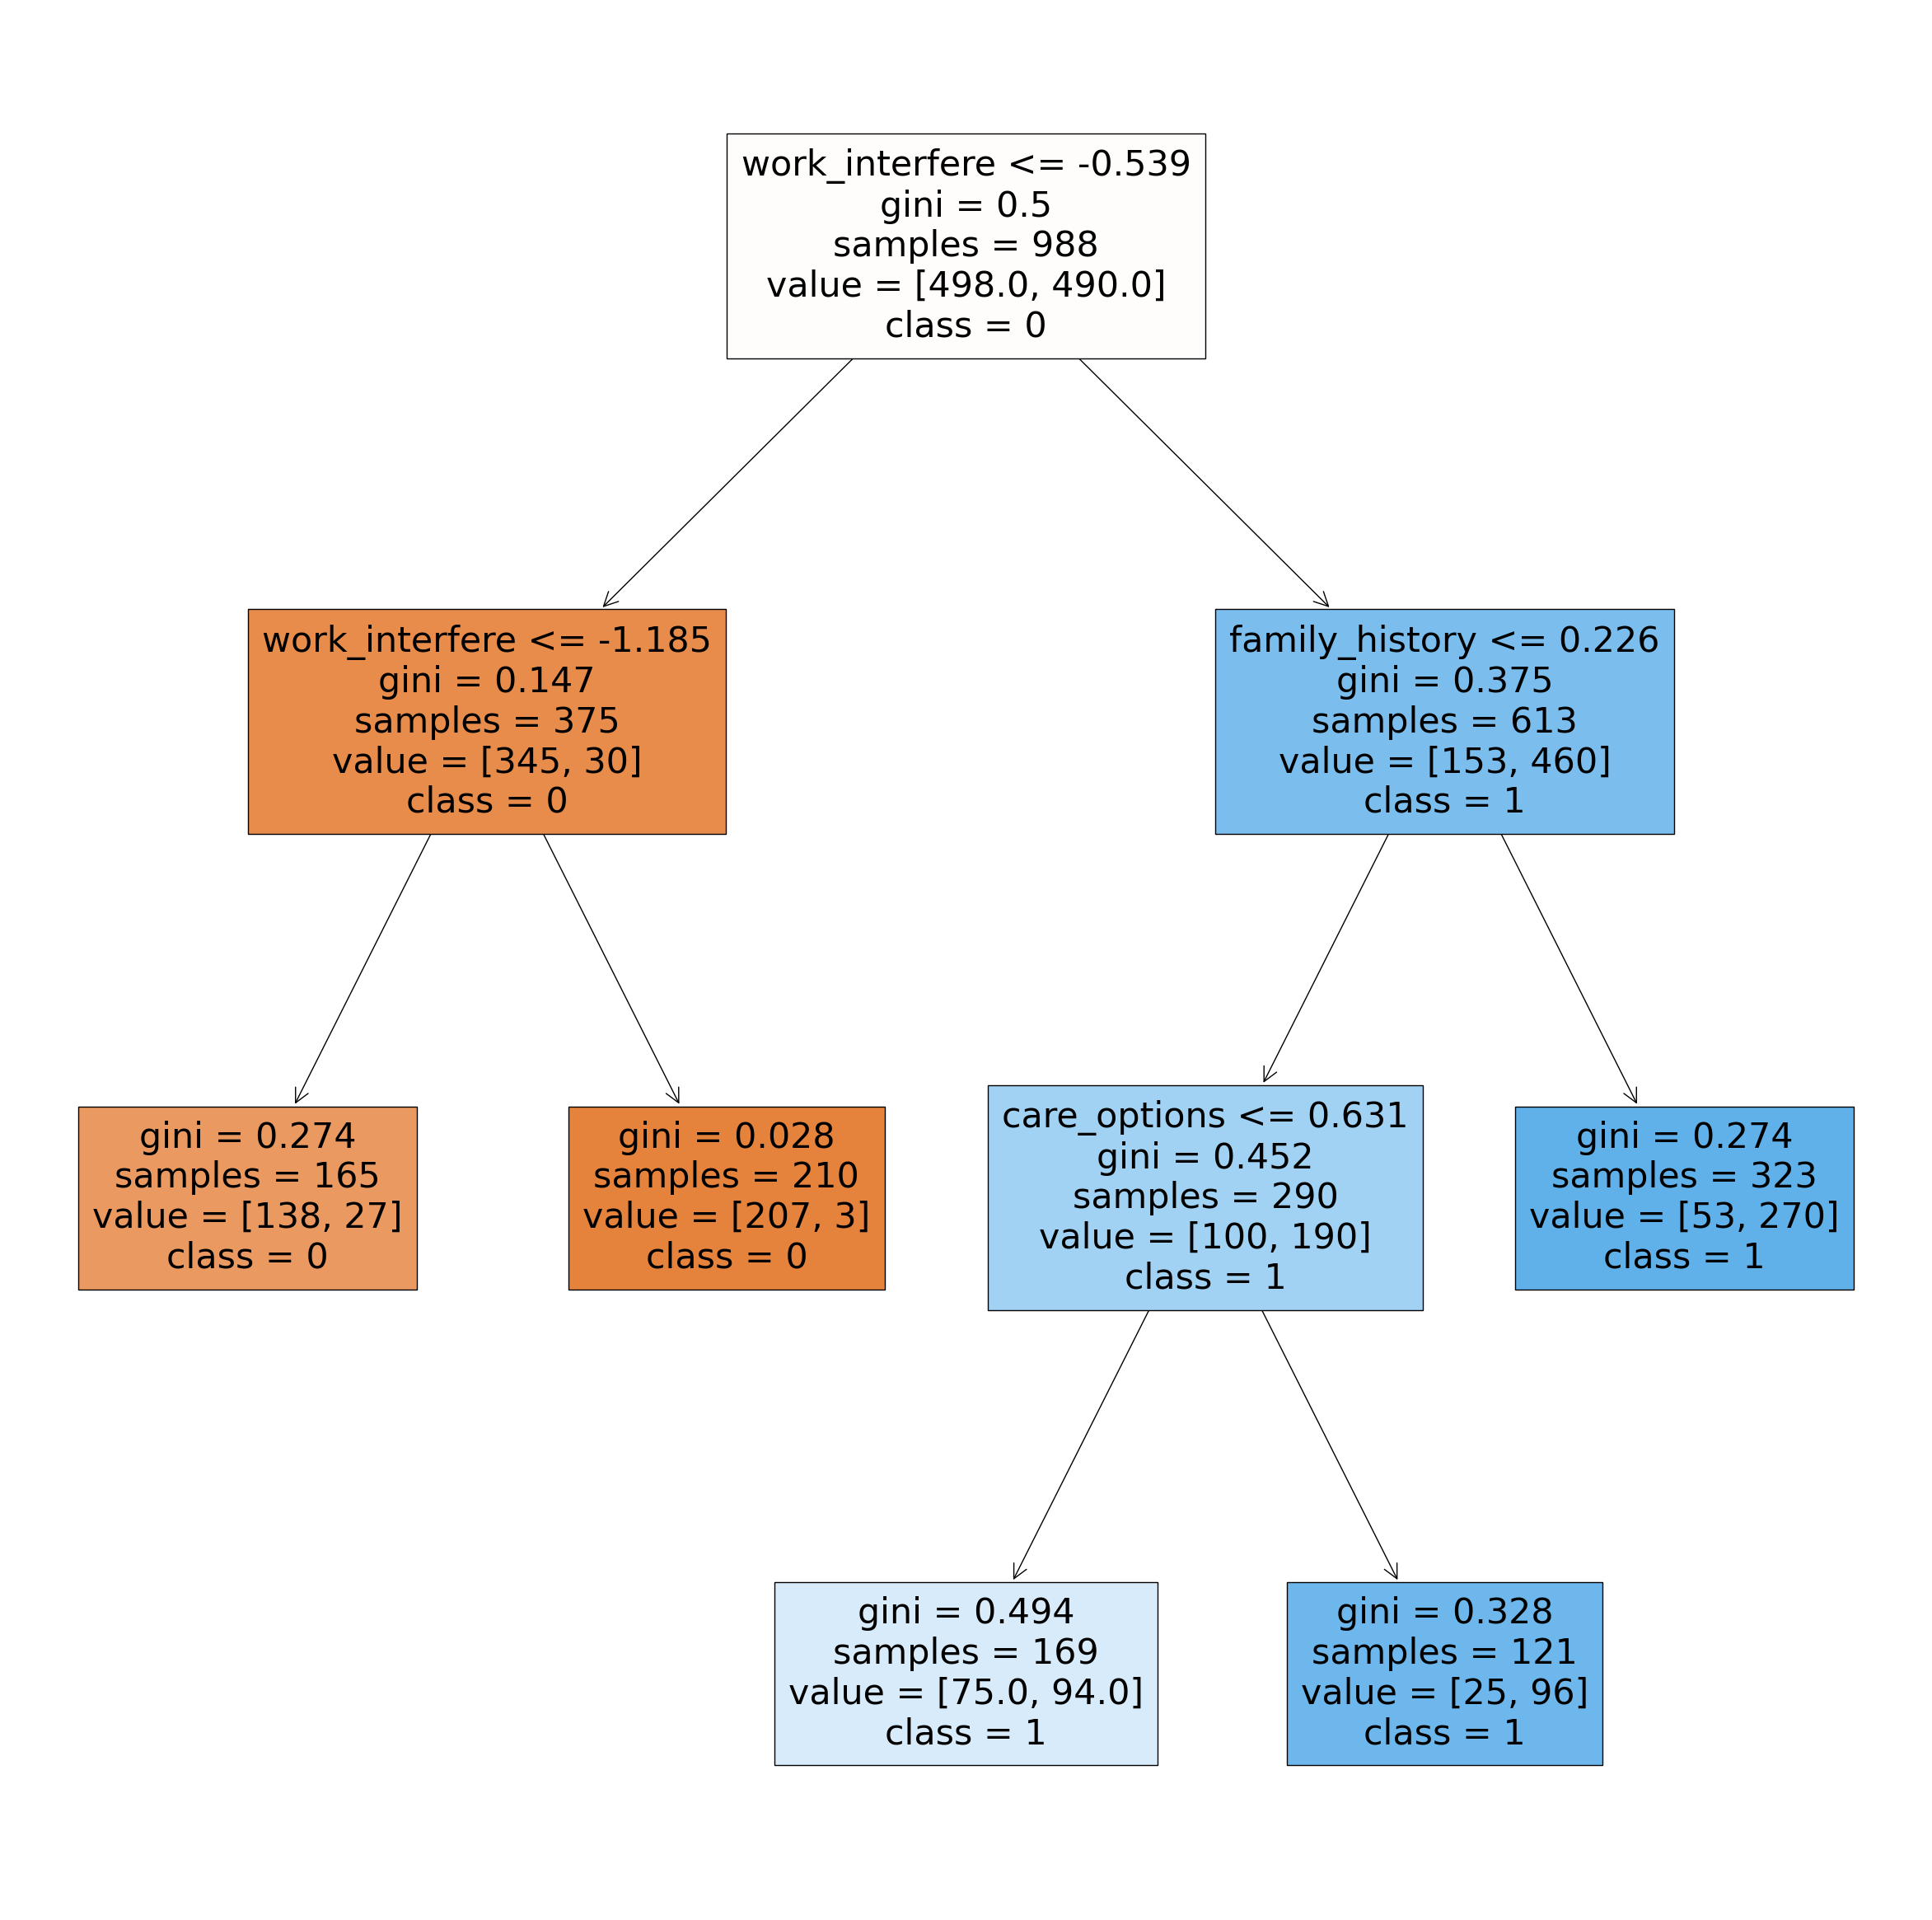

In [689]:
# save the column names in 'labels'
lables = X.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_grid_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [690]:
y_pred=dt_grid_model.predict(X_test)

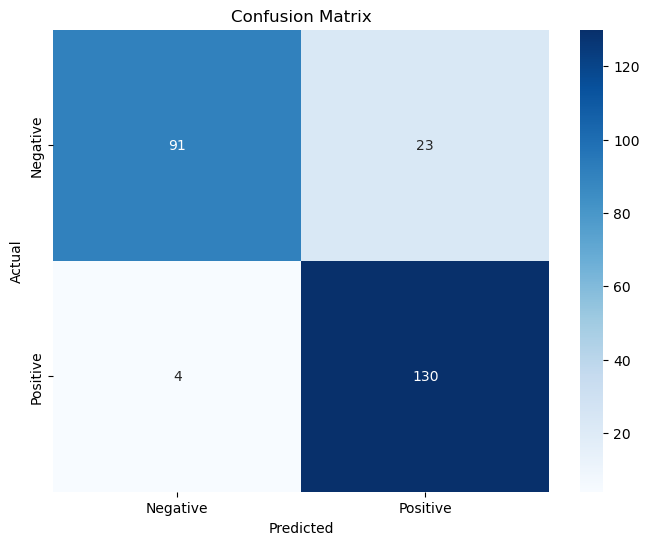

In [691]:
plot_confusion_matrix(dt_grid_model)

In [692]:
test_report=get_test_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       114
           1       0.85      0.97      0.91       134

    accuracy                           0.89       248
   macro avg       0.90      0.88      0.89       248
weighted avg       0.90      0.89      0.89       248



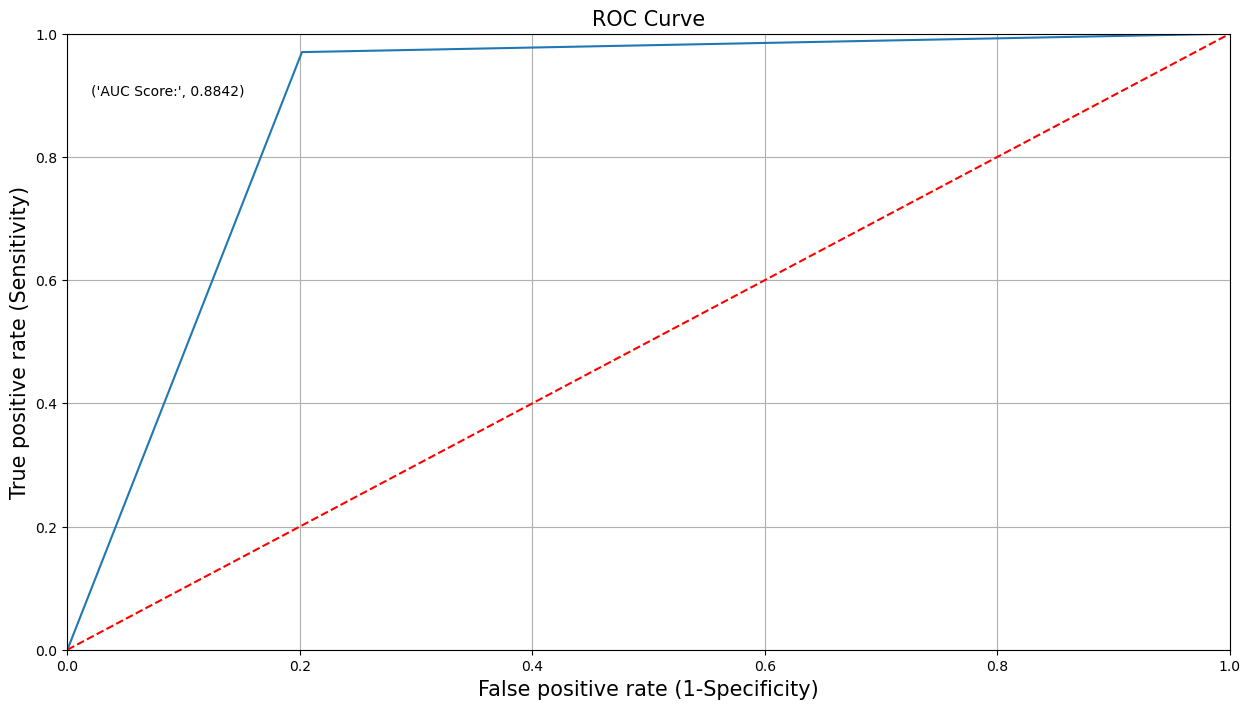

In [693]:
plot_roc(dt_grid_model)

In [694]:
update_score_card(dt_grid_model,model_name='Decision Tree using grid search')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,Cross-Validation Mean Accuracy,Cross-Validation Std Accuracy
0,SVM,0.856965,0.861314,0.880597,0.858871,0.715335,0.870849,0.786407,0.032000
1,SVM with grid search CV,0.847539,0.843972,0.888060,0.850806,0.698277,0.865455,0.783413,0.028501
2,Decision Tree,0.831500,0.859375,0.820896,0.830645,0.660407,0.839695,0.729790,0.013361
3,Decision Tree using grid search,0.884197,0.849673,0.970149,0.891129,0.778072,0.905923,0.814767,0.015376


# Model 5(Gradient Booster)

In [695]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()

# Fit the model
gb_model=gb.fit(X_train, y_train)

In [696]:
y_pred=gb_model.predict(X_test)

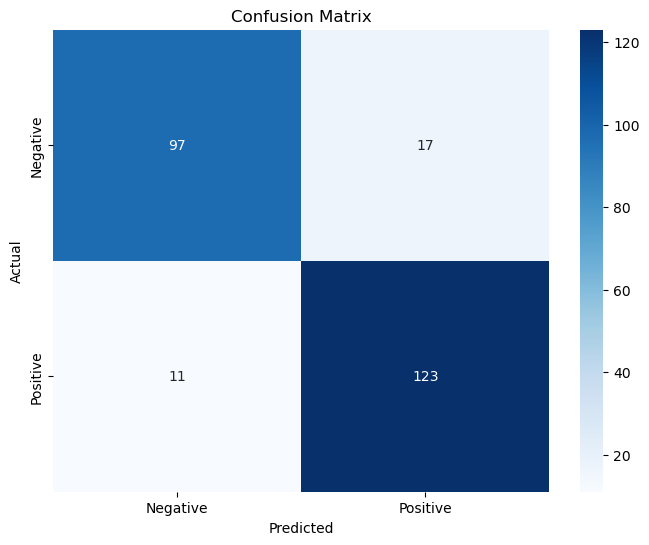

In [697]:
plot_confusion_matrix(gb_model)

In [698]:
kappa_score(gb_model)

0.7718191377497371

In [699]:
test_report=get_test_report(gb_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       114
           1       0.88      0.92      0.90       134

    accuracy                           0.89       248
   macro avg       0.89      0.88      0.89       248
weighted avg       0.89      0.89      0.89       248



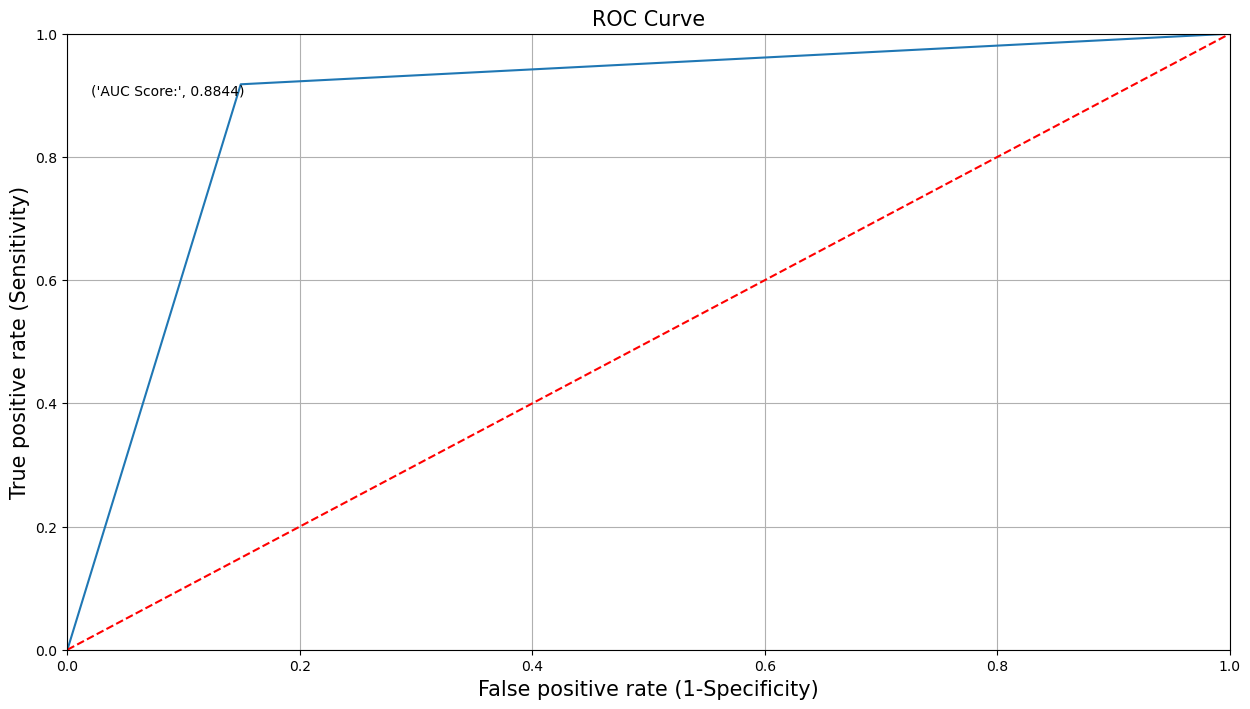

In [700]:
plot_roc(gb_model)

In [701]:
update_score_card(gb_model,model_name='Gradient Booster')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,Cross-Validation Mean Accuracy,Cross-Validation Std Accuracy
0,SVM,0.856965,0.861314,0.880597,0.858871,0.715335,0.870849,0.786407,0.032000
1,SVM with grid search CV,0.847539,0.843972,0.888060,0.850806,0.698277,0.865455,0.783413,0.028501
2,Decision Tree,0.831500,0.859375,0.820896,0.830645,0.660407,0.839695,0.729790,0.013361
3,Decision Tree using grid search,0.884197,0.849673,0.970149,0.891129,0.778072,0.905923,0.814767,0.015376
4,Gradient Booster,0.884394,0.878571,0.917910,0.887097,0.771819,0.897810,0.791488,0.019615


# Model 6(Ada Boost Classifier)

In [702]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model
ada = AdaBoostClassifier()

# Fit the model
ada_model=ada.fit(X_train, y_train)

In [703]:
y_pred=ada_model.predict(X_test)

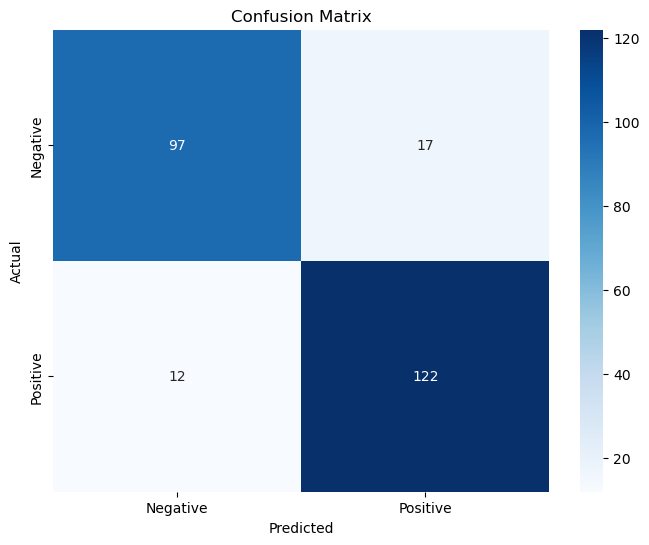

In [704]:
plot_confusion_matrix(ada_model)

In [705]:
kappa_score(ada_model)

0.7638250361224221

In [706]:
test_report=get_test_report(ada_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       114
           1       0.88      0.91      0.89       134

    accuracy                           0.88       248
   macro avg       0.88      0.88      0.88       248
weighted avg       0.88      0.88      0.88       248



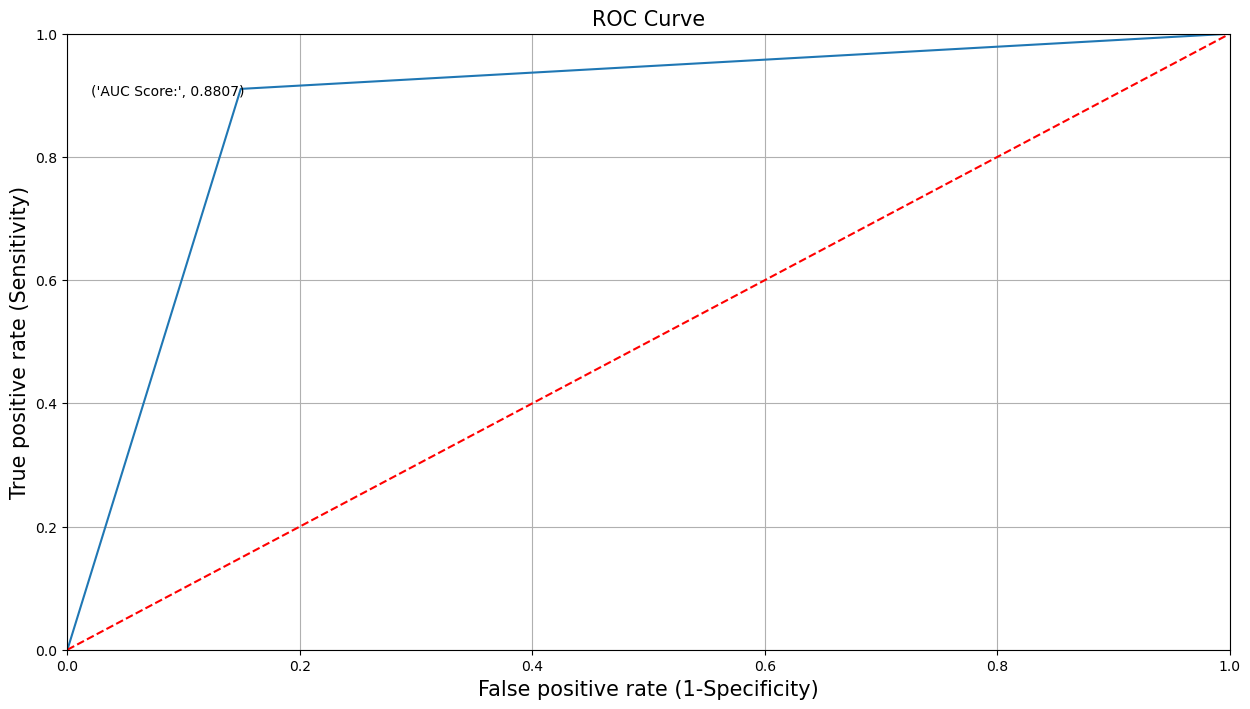

In [707]:
plot_roc(ada_model)

In [708]:
update_score_card(ada_model,model_name='Ada Boost Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,Cross-Validation Mean Accuracy,Cross-Validation Std Accuracy
0,SVM,0.856965,0.861314,0.880597,0.858871,0.715335,0.870849,0.786407,0.032000
1,SVM with grid search CV,0.847539,0.843972,0.888060,0.850806,0.698277,0.865455,0.783413,0.028501
2,Decision Tree,0.831500,0.859375,0.820896,0.830645,0.660407,0.839695,0.729790,0.013361
3,Decision Tree using grid search,0.884197,0.849673,0.970149,0.891129,0.778072,0.905923,0.814767,0.015376
4,Gradient Booster,0.884394,0.878571,0.917910,0.887097,0.771819,0.897810,0.791488,0.019615
5,Ada Boost Classifier,0.880662,0.877698,0.910448,0.883065,0.763825,0.893773,0.801651,0.028322


# Model 7(LogisticRegression)

In [709]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression( max_iter=10000)

# Fit the model
lr_model=lr.fit(X_train, y_train)

In [710]:
y_pred=lr_model.predict(X_test)

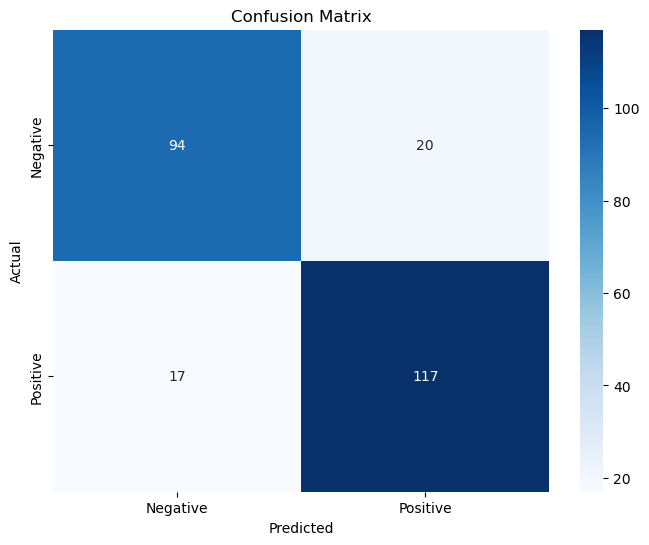

In [711]:
plot_confusion_matrix(lr_model)

In [712]:
kappa_score(lr_model)

0.6990686081595172

In [713]:
test_report=get_test_report(lr_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       114
           1       0.85      0.87      0.86       134

    accuracy                           0.85       248
   macro avg       0.85      0.85      0.85       248
weighted avg       0.85      0.85      0.85       248



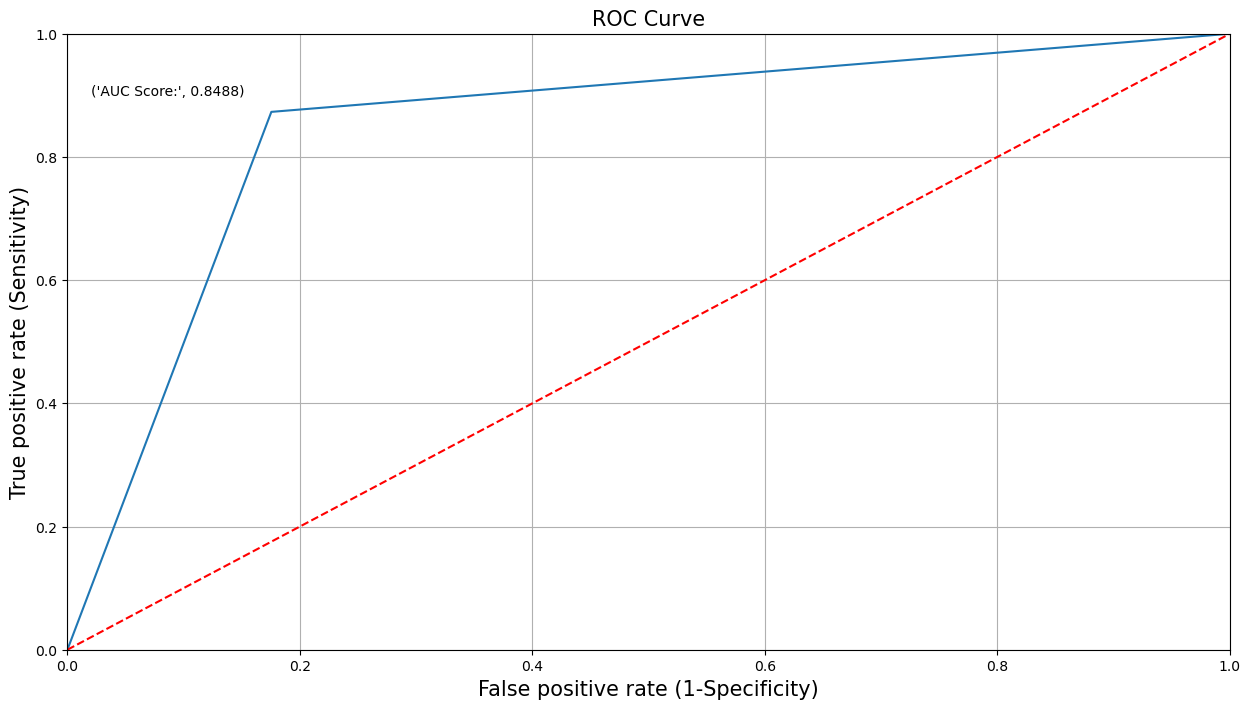

In [714]:
plot_roc(lr_model)

In [715]:
update_score_card(lr_model,model_name='Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,Cross-Validation Mean Accuracy,Cross-Validation Std Accuracy
0,SVM,0.856965,0.861314,0.880597,0.858871,0.715335,0.870849,0.786407,0.032000
1,SVM with grid search CV,0.847539,0.843972,0.888060,0.850806,0.698277,0.865455,0.783413,0.028501
2,Decision Tree,0.831500,0.859375,0.820896,0.830645,0.660407,0.839695,0.729790,0.013361
3,Decision Tree using grid search,0.884197,0.849673,0.970149,0.891129,0.778072,0.905923,0.814767,0.015376
4,Gradient Booster,0.884394,0.878571,0.917910,0.887097,0.771819,0.897810,0.791488,0.019615
5,Ada Boost Classifier,0.880662,0.877698,0.910448,0.883065,0.763825,0.893773,0.801651,0.028322
6,Logistic Regression,0.848848,0.854015,0.873134,0.850806,0.699069,0.863469,0.789422,0.036632


# Important features of best model

In [716]:
# Extract feature importances
feature_importances = dt_grid_model.feature_importances_


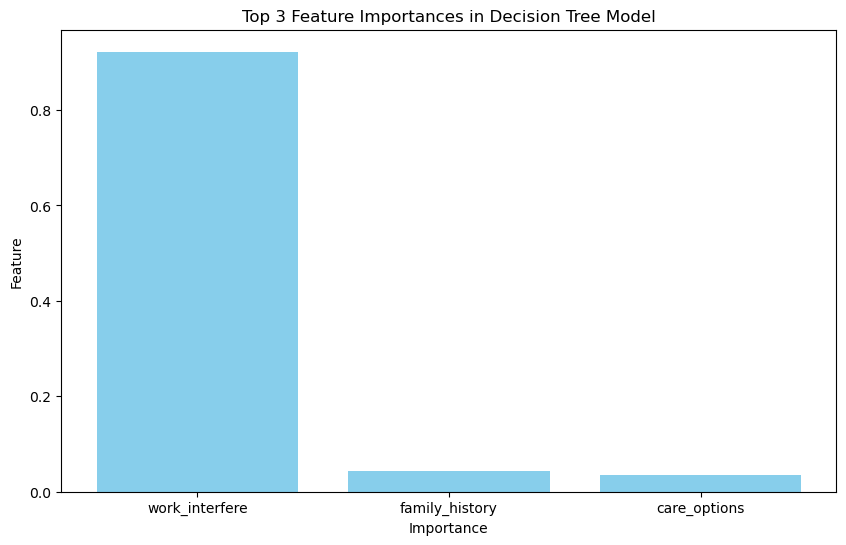

In [719]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is a DataFrame
feature_names = X.columns.values

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance and select top 3
top_importances_df = importances_df.sort_values(by='Importance', ascending=False).head(3)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_importances_df['Feature'], top_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 3 Feature Importances in Decision Tree Model')
plt.show()



In [718]:
feat_labels = X.columns.values
# Print the name and gini importance of each feature
feature_importance = []
for feature in zip(feat_labels, dt_grid_model.feature_importances_):
    #rint(feature)
    feature_importance.append(feature)
feature_importance

[('Age', 0.0),
 ('Gender', 0.0),
 ('self_employed', 0.0),
 ('family_history', 0.04318469258823739),
 ('work_interfere', 0.9224998086701761),
 ('no_employees', 0.0),
 ('remote_work', 0.0),
 ('tech_company', 0.0),
 ('benefits', 0.0),
 ('care_options', 0.03431549874158645),
 ('wellness_program', 0.0),
 ('seek_help', 0.0),
 ('anonymity', 0.0),
 ('leave', 0.0),
 ('mental_health_consequence', 0.0),
 ('phys_health_consequence', 0.0),
 ('coworkers', 0.0),
 ('supervisor', 0.0),
 ('mental_health_interview', 0.0),
 ('phys_health_interview', 0.0),
 ('mental_vs_physical', 0.0),
 ('obs_consequence', 0.0)]